In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from difflib import SequenceMatcher

pd.options.mode.chained_assignment = None

In [2]:
def get_text_list(file_path):
    with open(file_path, 'rb') as f:
        texts = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
    return list(texts[texts['text_graph_desc'] == True]['text_id'])

In [3]:
paths = ['/home/zlovoblachko/local_realec/Exam2014/Task 1/Exam2014_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2015/Task 1/Exam2015_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2016/Task 1/Exam2016_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2017/Task 1/Exam2017_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2019/Task 1/Exam2019_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 1/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 2/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 3/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 4/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 5/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 6/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 7/Exam2020_text_table.tsv',
         '/home/zlovoblachko/local_realec/Exam2020/Task 8/Exam2020_text_table.tsv']

relevant_texts_nums = []

for path in paths:
    relevant_texts_nums.append(get_text_list(path))

In [4]:
def get_mistakes_tables(file_path, texts_list):
    with open(file_path, 'rb') as f:
        year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
    year_corpus['year'] = '_'.join(file_path.split('/')[4:6])
    return year_corpus[year_corpus['text_id'].isin(texts_list)]

In [5]:
paths_mistakes = ['/home/zlovoblachko/local_realec/Exam2014/Task 1/Exam2014_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2015/Task 1/Exam2015_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2016/Task 1/Exam2016_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2017/Task 1/Exam2017_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2019/Task 1/Exam2019_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 1/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 2/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 3/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 4/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 5/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 6/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 7/Exam2020_mistakes_table.tsv',
                   '/home/zlovoblachko/local_realec/Exam2020/Task 8/Exam2020_mistakes_table.tsv']

relevant_mistakes_all_df = pd.DataFrame()

In [6]:
for file_path, text_list in zip(paths_mistakes, relevant_texts_nums):
    relevant_mistakes_all_df = pd.concat([relevant_mistakes_all_df, get_mistakes_tables(file_path, text_list)])

relevant_mistakes_all_df.head()

/tmp/ipykernel_36031/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
/tmp/ipykernel_36031/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')
/tmp/ipykernel_36031/1294121175.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  year_corpus = pd.read_csv(f, sep='\t', encoding='utf-16 LE')


,mistake_id,text_id,sentence_id,ann_id,mistake_type,error_span,error_span_poses,cause,correction,first_token_id,...,mistake_corrected,correction_tokens,correction_poses,correction_lemmas,correction_token_spaces,ref_1,ref_2,span_start,span_end,year
0,1,1,7,T,Spelling,tendention,NN1,NaN,tendency,193,...,True,tendency,NN1,tendency,0,NaN,NaN,868,878,Exam2014_Task 1
1,2,1,1,T,Agreement_errors,visualize,VVB,NaN,demonstrates,3,...,False,demonstrates,VVZ,demonstrate,0,NaN,NaN,14,23,Exam2014_Task 1
2,3,1,4,T,Redundant_comp,part,NN1,NaN,NaN,108,...,False,NaN,NaN,NaN,NaN,NaN,NaN,509,513,Exam2014_Task 1
3,4,1,4,A,Delete,NaN,NaN,NaN,NaN,108,...,False,NaN,NaN,NaN,NaN,3.0,NaN,not found,not found,Exam2014_Task 1
4,5,1,5,T,Spelling,whew,VVB,NaN,when,149,...,True,when,AVQ,when,0,NaN,NaN,687,691,Exam2014_Task 1


In [7]:
mistakes_use = relevant_mistakes_all_df[['mistake_id', 'text_id', 'sentence_id', 'mistake_type', 'error_span', 'correction', 'span_start', 'span_end', 'year']]
mistakes_use.head()

,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year
0,1,1,7,Spelling,tendention,tendency,868,878,Exam2014_Task 1
1,2,1,1,Agreement_errors,visualize,demonstrates,14,23,Exam2014_Task 1
2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1
3,4,1,4,Delete,NaN,NaN,not found,not found,Exam2014_Task 1
4,5,1,5,Spelling,whew,when,687,691,Exam2014_Task 1


In [8]:
mistakes_use.groupby('mistake_type').size()

mistake_type
Absence_comp_sent       2343
Absence_explanation     1690
Adj_as_collective         14
Adjectives                43
Adverbs                   14
                       ...  
note                     416
punct                   8595
spell                   1487
suggestion               853
vocab                  10382
Length: 80, dtype: int64

<Axes: xlabel='mistake_type'>

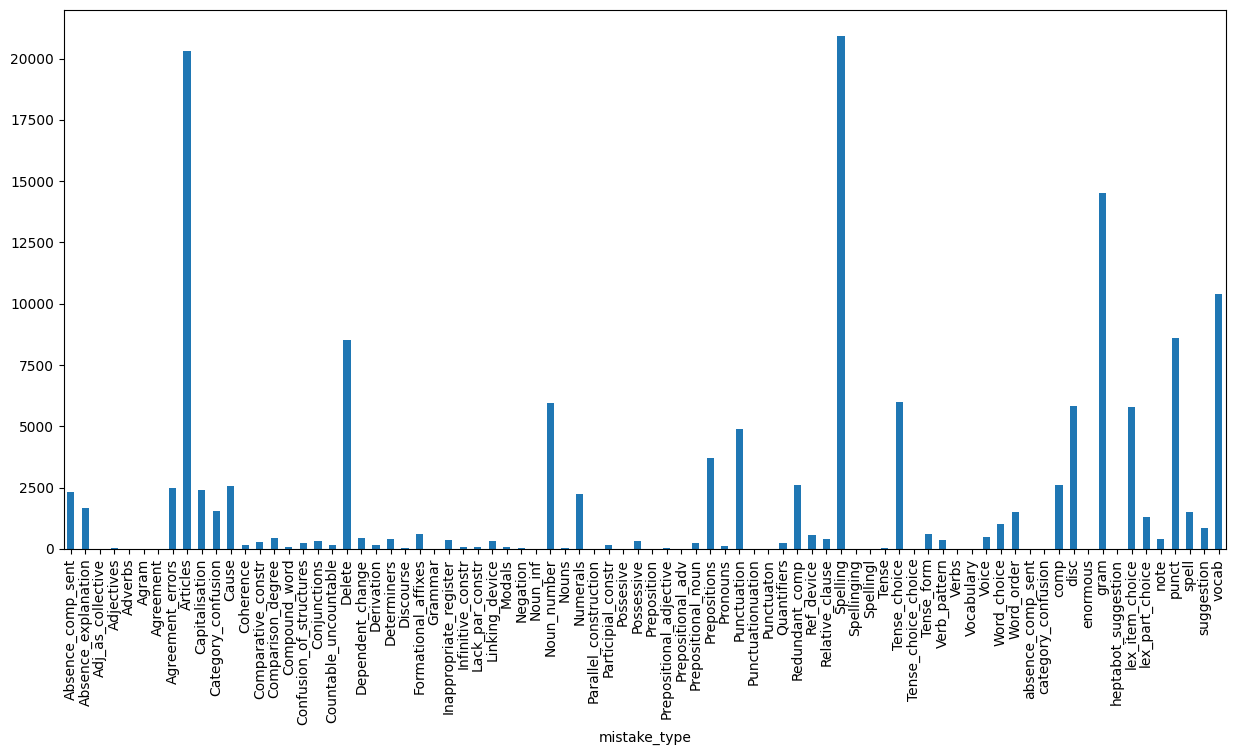

In [9]:
plt.figure(figsize=(15, 7))
mistakes_use.groupby('mistake_type').size().plot(kind='bar')

<Axes: xlabel='mistake_type'>

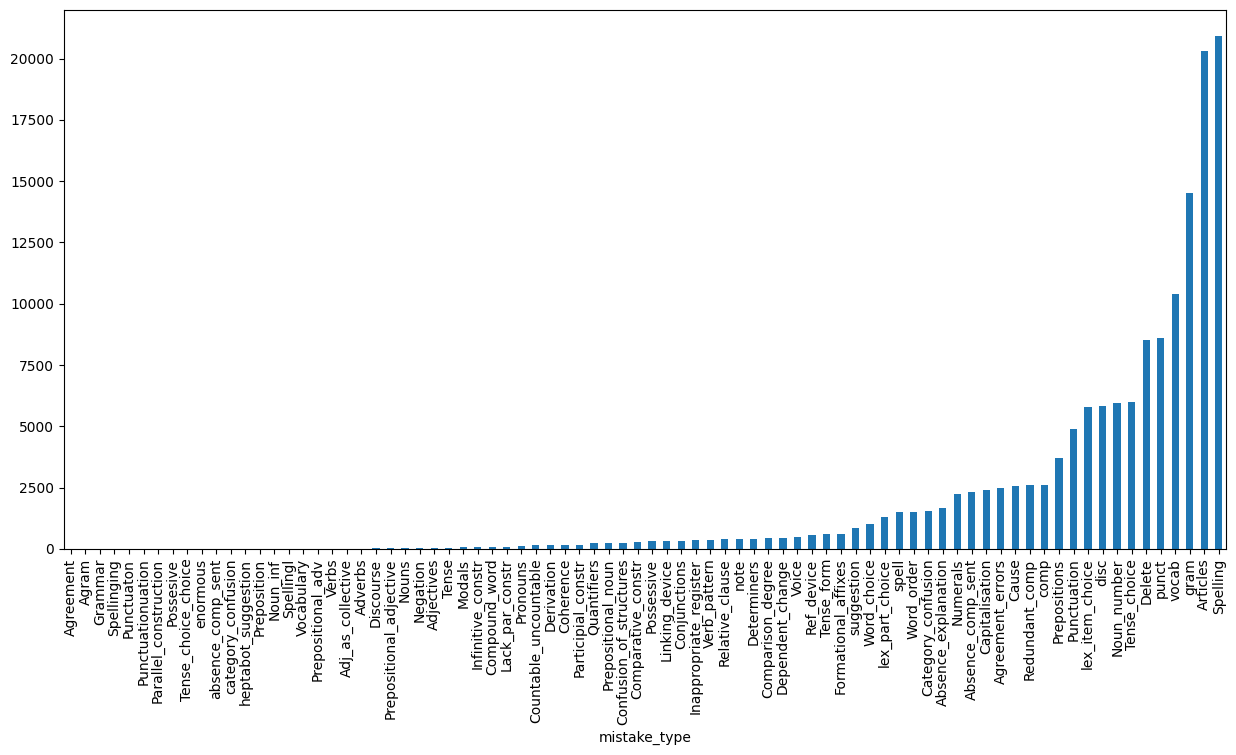

In [10]:
plt.figure(figsize=(15, 7))
mistakes_use.groupby('mistake_type').size().sort_values().plot(kind='bar')

In [11]:
mistakes_filtered = mistakes_use[mistakes_use['mistake_type'].isin(['Punctuation',
                                                                    'Capitalisation',
                                                                    'Spelling',
                                                                    'Determiners',
                                                                    'Verbs',
                                                                    'Nouns',
                                                                    'Prepositions',
                                                                    'Conjunctions',
                                                                    'Adjectives',
                                                                    'Adverbs',
                                                                    'Numerals',
                                                                    'Pronouns',
                                                                    'Articles',
                                                                    'Redundant_comp',
                                                                    'Prepositional_noun',
                                                                    'Noun_number',
                                                                    'Countable_uncountable',
                                                                    'Tense',
                                                                    'Tense_choice',
                                                                    'Tense_form',
                                                                    'Voice',
                                                                    'Modals',
                                                                    'Verb_pattern',
                                                                    'Prepositional_adjective',
                                                                    'Participal_constr',
                                                                    'Agreement',
                                                                    'Word_order',
                                                                    'Relative_clause',
                                                                    'Parallel_construction',
                                                                    'Confusion_of_structures',
                                                                    'Word_choice',
                                                                    'lex_item_choice',
                                                                    'Derivation',
                                                                    'Category_confusion',
                                                                    'Formational_affixes',
                                                                    'Coherence',
                                                                    'Linking_device',
                                                                    'Ref_device',
                                                                    'Inappropriate_register',
                                                                    'Absence_comp_sent',
                                                                    'Redundant_comp',
                                                                    'Absence_explanation'])]

mistakes_filtered.reset_index(inplace=True)

<Axes: xlabel='mistake_type'>

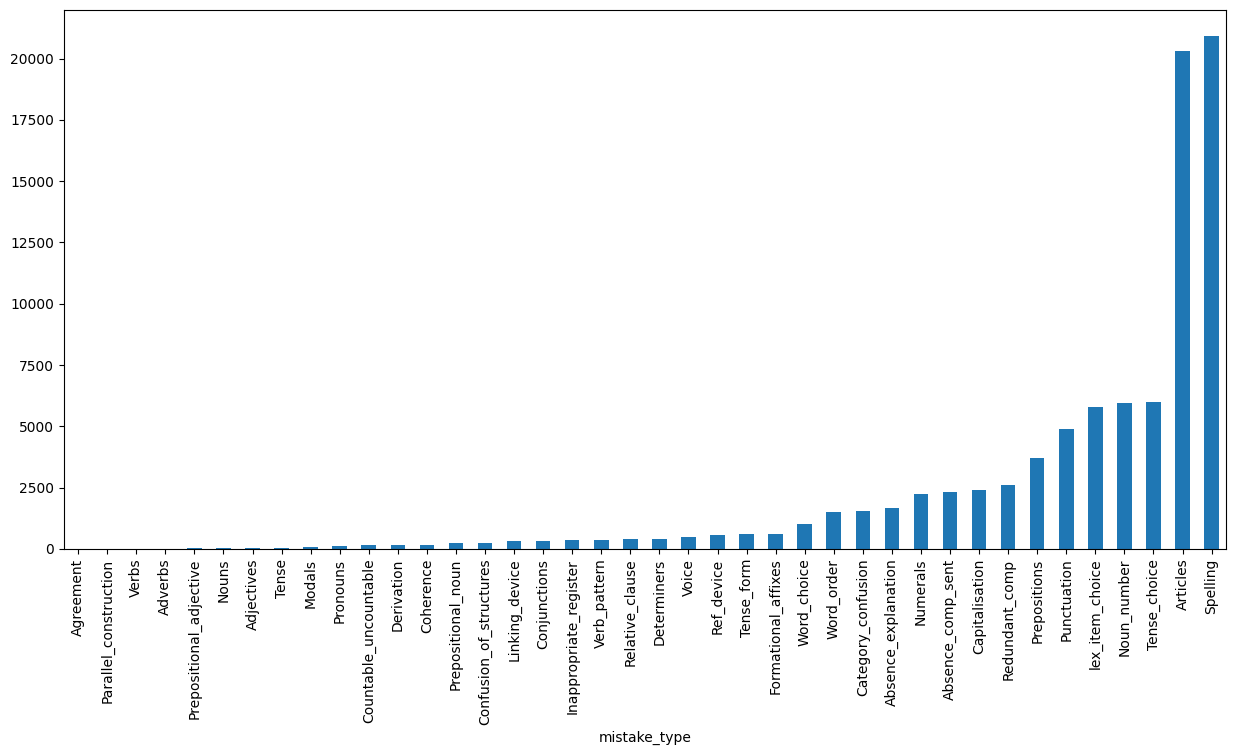

In [12]:
plt.figure(figsize=(15, 7))
mistakes_filtered.groupby('mistake_type').size().sort_values().plot(kind='bar') # TODO: log_scale

In [13]:
mistakes_filtered.groupby('mistake_type').size().sort_values()

mistake_type
Agreement                      1
Parallel_construction          1
Verbs                         11
Adverbs                       14
Prepositional_adjective       34
Nouns                         36
Adjectives                    43
Tense                         44
Modals                        66
Pronouns                     138
Countable_uncountable        145
Derivation                   153
Coherence                    162
Prepositional_noun           239
Confusion_of_structures      246
Linking_device               336
Conjunctions                 336
Inappropriate_register       369
Verb_pattern                 385
Relative_clause              393
Determiners                  421
Voice                        492
Ref_device                   560
Tense_form                   594
Formational_affixes          603
Word_choice                 1038
Word_order                  1501
Category_confusion          1553
Absence_explanation         1690
Numerals                    22

Отфильтруем все, что ниже 50:

In [14]:
mistakes_filtered

,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year
0,0,1,1,7,Spelling,tendention,tendency,868,878,Exam2014_Task 1
1,2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1
2,4,5,1,5,Spelling,whew,when,687,691,Exam2014_Task 1
3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1
4,6,7,1,1,lex_item_choice,visualize,demonstrates,14,23,Exam2014_Task 1
...,...,...,...,...,...,...,...,...,...,...
88755,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8
88756,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8
88757,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8
88758,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8


In [15]:
mistakes_filtered_2 = mistakes_filtered[-mistakes_filtered['mistake_type'].isin(['Agreement', 
                                                                                 'Verbs', 
                                                                                 'Adverbs',
                                                                                 'Prepositional_adjective', 
                                                                                 'Nouns', 
                                                                                 'Adjectives', 
                                                                                 'Tense',
                                                                                 'Spelling',
                                                                                 'Parallel_construction'])]

mistakes_filtered_2.reset_index(inplace=True)

<Axes: xlabel='mistake_type'>

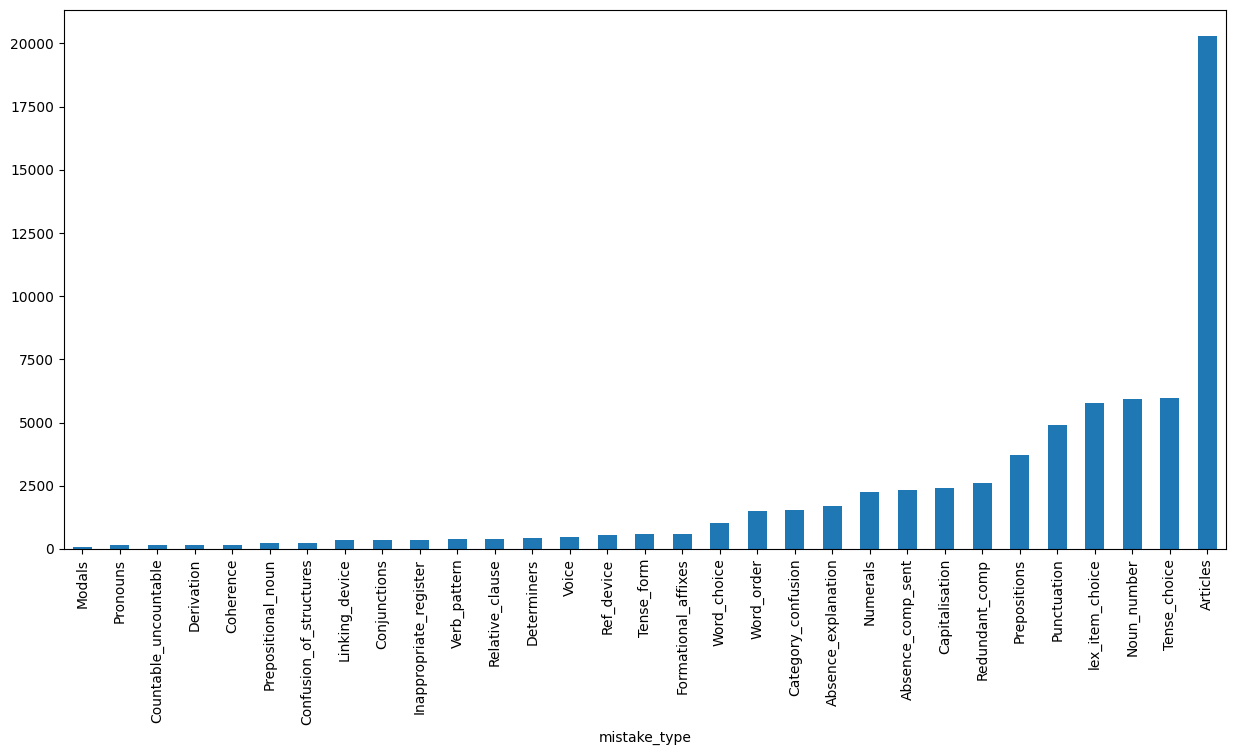

In [16]:
plt.figure(figsize=(15, 7))
mistakes_filtered_2.groupby('mistake_type').size().sort_values().plot(kind='bar')

In [17]:
mistakes_filtered_2.to_csv('/home/zlovoblachko/diploma/Filtered_orig_tags.tsv', sep='\t', encoding='utf-8', index=False)

Варианты разбивки:
 - Укрупнить категории по документации REALEC
 - Воспользоваться кодами ошибок из (Nicholls 2003)
 - Воспользоваться кодами ошибок из ()



In [18]:
mistakes_filtered_2['bigger_code'] = ['Grammar' if x in['Modals',
                                                        'Pronouns',
                                                        'Countable_uncountable',
                                                        'Prepositional_noun',
                                                        'Conjunctions',
                                                        'Verb_pattern',
                                                        'Determiners',
                                                        'Voice',
                                                        'Tense_form',
                                                        'Numerals',
                                                        'Prepositions',
                                                        'Noun_number',
                                                        'Tense_choice',
                                                        'Articles'] else 'Vocabulary' if x in ['Derivation',
                                                                                               'Formational_affixes',
                                                                                               'Word_choice',
                                                                                               'lex_item_choice',
                                                                                               'Category_confusion'] else 'Discourse' if x in ['Coherence',
                                                                                                                                               'Linking_device',
                                                                                                                                               'Ref_device',
                                                                                                                                               'Inappropriate_register',
                                                                                                                                               'lex_item_choice',
                                                                                                                                               'Absence_explanation',
                                                                                                                                               'Absence_comp_sent',
                                                                                                                                               'Redundant_comp'] else 'Syntax' if x in ['Word_order',
                                                                                                                                                                                        'Relative_clause',
                                                                                                                                                                                        'Confusion_of_structures'] else 'Punctuation' if x == 'Punctuation' else 'Capitalisation' if x == 'Capitalisation' else 'None' for x in mistakes_filtered_2['mistake_type']]

In [19]:
mistakes_filtered_2

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code
0,1,2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1,Discourse
1,3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1,Grammar
2,4,6,7,1,1,lex_item_choice,visualize,demonstrates,14,23,Exam2014_Task 1,Vocabulary
3,5,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse
4,6,8,9,1,3,lex_item_choice,incline,increase,366,373,Exam2014_Task 1,Vocabulary
...,...,...,...,...,...,...,...,...,...,...,...,...
67636,88755,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8,Grammar
67637,88756,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8,Grammar
67638,88757,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8,Grammar
67639,88758,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8,Grammar


<Axes: >

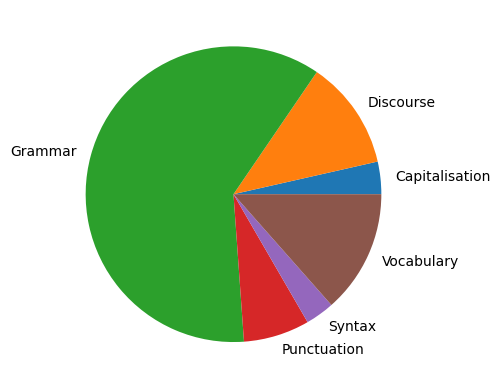

In [20]:
mistakes_filtered_2.groupby('bigger_code').size().plot(kind='pie')

In [21]:
articles_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Articles']
articles_sampled_df = articles_df.sample(n=2000, random_state=1)
non_articles_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] != 'Articles']
choice_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Tense_choice']
choice_sampled_df = articles_df.sample(n=2000, random_state=1)
number_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Noun_number']
number_sampled_df = articles_df.sample(n=2000, random_state=1)
prep_df = mistakes_filtered_2[mistakes_filtered_2['mistake_type'] == 'Prepositions']
prep_sampled_df = articles_df.sample(n=2000, random_state=1)
non_df = mistakes_filtered_2[-mistakes_filtered_2['mistake_type'].isin(['Articles', 'Tense_choice', 'Noun_number', 'Prepositions'])]
filtered_mistakes_df = pd.concat([non_df, articles_sampled_df, choice_sampled_df, number_sampled_df, prep_sampled_df])
filtered_mistakes_df.reset_index(drop=True, inplace=True)
filtered_mistakes_df

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code
0,1,2,3,1,4,Redundant_comp,part,NaN,509,513,Exam2014_Task 1,Discourse
1,4,6,7,1,1,lex_item_choice,visualize,demonstrates,14,23,Exam2014_Task 1,Vocabulary
2,5,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse
3,6,8,9,1,3,lex_item_choice,incline,increase,366,373,Exam2014_Task 1,Vocabulary
4,8,10,11,1,4,Absence_explanation,a population,the Japanese population,436,448,Exam2014_Task 1,Discourse
...,...,...,...,...,...,...,...,...,...,...,...,...
39681,15018,1203,33,42,6,Articles,a country,the countryside,854,863,Exam2015_Task 1,Grammar
39682,76249,11024,20,583,6,Articles,"the normal, was the same","normal, was the same",693,717,Exam2020_Task 5,Grammar
39683,76747,15326,10,794,3,Articles,quantity,the quantity,525,533,Exam2020_Task 5,Grammar
39684,67114,39490,18,1831,8,Articles,young age,a young age,811,820,Exam2020_Task 2,Grammar


<Axes: >

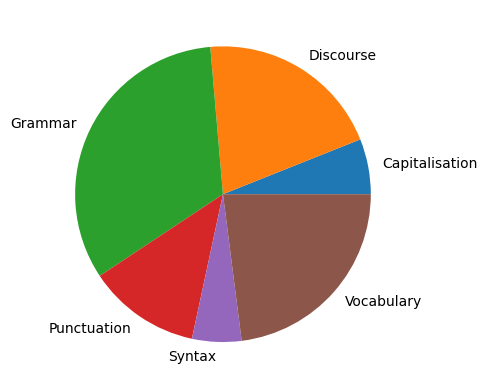

In [22]:
filtered_mistakes_df.groupby('bigger_code').size().plot(kind='pie')

In [23]:
filtered_mistakes_df.groupby('bigger_code').size()

bigger_code
Capitalisation     2399
Discourse          8066
Grammar           13076
Punctuation        4886
Syntax             2140
Vocabulary         9119
dtype: int64

## Моя система тегов

In [ ]:
def assign_tag(error_span: str, correction_span: str):
    if correction_span == '':
        return "U"
    error_words = error_span.lower().split()
    correction_words = correction_span.lower().split()
    matcher = SequenceMatcher(None, error_words, correction_words)
    operations = matcher.get_opcodes()
    for tag, i1, i2, j1, j2 in operations:
        if tag == "insert":
            return "M"  # A word is added
        elif tag == "delete":
            return "U"  # A word is removed
        elif tag == "replace":
            return "R"  # A word is replaced
    return "R"  # Default to "R" if no change is detected (edge case)

mistakes_labelling = mistakes_filtered_2.copy()
mistakes_labelling["first_level_tag"] = mistakes_labelling.apply(lambda row: assign_tag(row["error_span"], row["correction"]), axis=1)

       level_0  index  mistake_id  text_id  sentence_id         mistake_type  \
1            3      5           6        1            1             Articles   
2            4      6           7        1            1      lex_item_choice   
3            5      7           8        1            2  Absence_explanation   
4            6      8           9        1            3      lex_item_choice   
5            7      9          10        1            4             Articles   
...        ...    ...         ...      ...          ...                  ...   
67636    88755   9493          16      453            5             Articles   
67637    88756   9501          24      453            6          Noun_number   
67638    88757   9571           5      455            1             Articles   
67639    88758   9574           8      455            2             Articles   
67640    88759   9578          12      455            3          Noun_number   

                             error_span

In [35]:
mistake_types = mistakes_labelling["mistake_type"].unique()
mistake_types

array(['Articles', 'lex_item_choice', 'Absence_explanation',
       'Tense_choice', 'Punctuation', 'Word_choice', 'Ref_device',
       'Formational_affixes', 'Numerals', 'Relative_clause', 'Tense_form',
       'Prepositional_noun', 'Prepositions', 'Category_confusion',
       'Voice', 'Derivation', 'Redundant_comp', 'Confusion_of_structures',
       'Noun_number', 'Word_order', 'Absence_comp_sent', 'Pronouns',
       'Verb_pattern', 'Coherence', 'Determiners', 'Linking_device',
       'Capitalisation', 'Conjunctions', 'Modals',
       'Countable_uncountable', 'Inappropriate_register'], dtype=object)

Первая версия

In [65]:
errors_correspondence = {'Articles': 'DET: ART',
                         'lex_item_choice': 'WORD',
                         'Absence_explanation': 'MULTIWORD',
                         'Tense_choice': 'VERB: TENSE', 
                         'Punctuation': 'PUNCT', 
                         'Word_choice': 'MULTIWORD', 
                         'Ref_device': 'REF',
                         'Formational_affixes': 'FORM',
                         'Numerals': 'NUM', 
                         'Relative_clause': 'RELCL', 
                         'Tense_form': 'VERB: TENSE',
                         'Prepositional_noun': 'PREP', 
                         'Prepositions': 'PREP', 
                         'Category_confusion': 'MORPH',
                         'Voice': 'VERB: FORM', 
                         'Derivation': 'FORM', 
                         'Redundant_comp': 'POS', 
                         'Confusion_of_structures': 'STRUCT',
                         'Noun_number': 'FORM', 
                         'Word_order': 'WO', 
                         'Absence_comp_sent': 'STRUCT', 
                         'Pronouns': 'PRON',
                         'Verb_pattern': 'PATTERN', 
                         'Coherence': 'COHER', 
                         'Determiners': 'DET', 
                         'Linking_device': 'LINK',
                         'Capitalisation': 'ORTH', 
                         'Conjunctions': 'CONJ', 
                         'Modals': 'INFL',
                         'Countable_uncountable': 'FORM', 
                         'Inappropriate_register': 'MULTIWORD'}

In [66]:
def assign_secondary_tag(realec_tag):
    return errors_correspondence[realec_tag]

In [67]:
mistakes_labelling["second_level_tag"] = mistakes_labelling.apply(lambda row: assign_secondary_tag(row["mistake_type"]), axis=1)

In [68]:
mistakes_labelling

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code,first_level_tag,second_level_tag
1,3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1,Grammar,M,DET: ART
2,4,6,7,1,1,lex_item_choice,visualize,demonstrates,14,23,Exam2014_Task 1,Vocabulary,R,WORD
3,5,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse,M,MULTIWORD
4,6,8,9,1,3,lex_item_choice,incline,increase,366,373,Exam2014_Task 1,Vocabulary,R,WORD
5,7,9,10,1,4,Articles,a population,the Japanese population,436,448,Exam2014_Task 1,Grammar,R,DET: ART
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67636,88755,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8,Grammar,U,DET: ART
67637,88756,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8,Grammar,R,FORM
67638,88757,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8,Grammar,U,DET: ART
67639,88758,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8,Grammar,U,DET: ART


<Axes: >

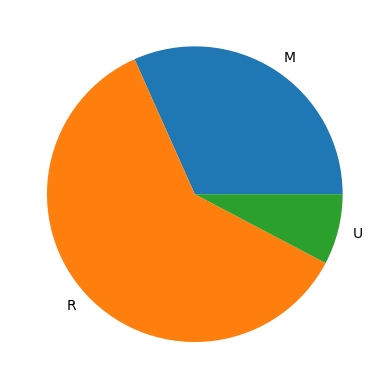

In [69]:
mistakes_labelling.groupby('first_level_tag').size().plot(kind='pie')

<Axes: >

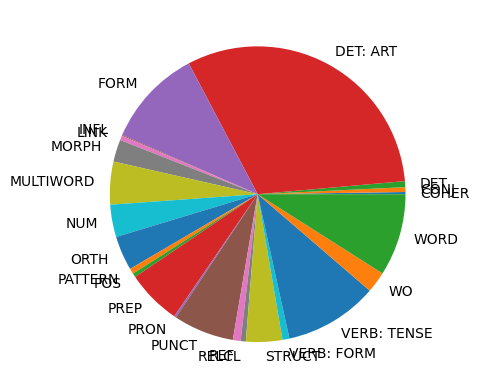

In [70]:
mistakes_labelling.groupby('second_level_tag').size().plot(kind='pie')

Много! Исправим.

Финальная версия:

In [75]:
errors_correspondence = {'Capitalisation': 'ORTH',
                         'Formational_affixes': 'FORM',
                         'Derivation': 'FORM',
                         'Noun_number': 'FORM', 
                         'Countable_uncountable': 'FORM',
                         'Category_confusion': 'MORPH',
                         'Articles': 'DET',
                         'Determiners': 'DET',
                         'Prepositional_noun': 'POS', # PREP
                         'Prepositions': 'POS', # PREP
                         'Verb_pattern': 'POS', # PREP
                         'Conjunctions': 'POS', # CONJ
                         'Pronouns': 'POS', # PRON
                         'Tense_choice': 'VERB', 
                         'Tense_form': 'VERB',
                         'Voice': 'VERB',
                         'Modals': 'VERB',
                         'Numerals': 'NUM',
                         'lex_item_choice': 'WORD',
                         'Absence_comp_sent': 'WORD',
                         'Inappropriate_register': 'WORD',
                         'Ref_device': 'WORD', 
                         'Linking_device': 'WORD',
                         'Punctuation': 'PUNCT',
                         'Relative_clause': 'PUNCT',
                         'Redundant_comp': 'MISS', 
                         'Confusion_of_structures': 'MULTIWORD',
                         'Word_order': 'MULTIWORD', 
                         'Word_choice': 'MULTIWORD',
                         'Absence_explanation': 'MULTIWORD',
                         'Coherence': 'MULTIWORD'
                         }

Проверим, что получится:

In [76]:
mistakes_labelling["second_level_tag"] = mistakes_labelling.apply(lambda row: assign_secondary_tag(row["mistake_type"]), axis=1)

In [77]:
mistakes_labelling

,level_0,index,mistake_id,text_id,sentence_id,mistake_type,error_span,correction,span_start,span_end,year,bigger_code,first_level_tag,second_level_tag
1,3,5,6,1,1,Articles,Given diagram,The given diagram,0,13,Exam2014_Task 1,Grammar,M,DET
2,4,6,7,1,1,lex_item_choice,visualize,demonstrates,14,23,Exam2014_Task 1,Vocabulary,R,WORD
3,5,7,8,1,2,Absence_explanation,century,XXth century,200,207,Exam2014_Task 1,Discourse,M,MULTIWORD
4,6,8,9,1,3,lex_item_choice,incline,increase,366,373,Exam2014_Task 1,Vocabulary,R,WORD
5,7,9,10,1,4,Articles,a population,the Japanese population,436,448,Exam2014_Task 1,Grammar,R,DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67636,88755,9493,16,453,5,Articles,the young age participants,young age participants,623,649,Exam2020_Task 8,Grammar,U,DET
67637,88756,9501,24,453,6,Noun_number,group,"groups,",827,832,Exam2020_Task 8,Grammar,R,FORM
67638,88757,9571,5,455,1,Articles,a a great variety,a great variety,49,66,Exam2020_Task 8,Grammar,U,DET
67639,88758,9574,8,455,2,Articles,the approximately the same range,approximately the same range,176,208,Exam2020_Task 8,Grammar,U,DET


<Axes: >

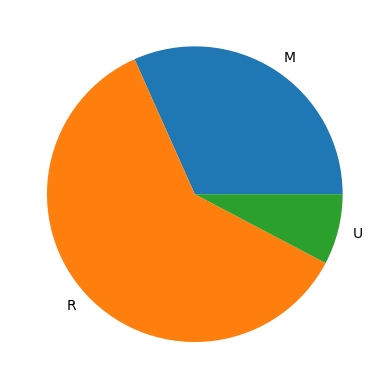

In [78]:
mistakes_labelling.groupby('first_level_tag').size().plot(kind='pie')

<Axes: >

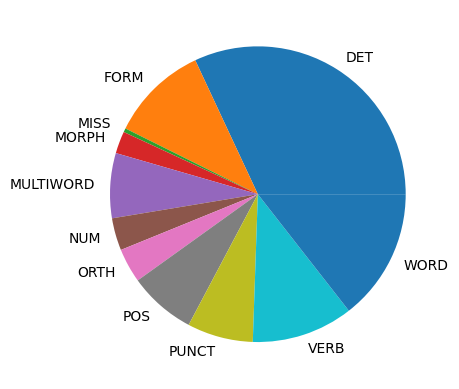

In [79]:
mistakes_labelling.groupby('second_level_tag').size().plot(kind='pie')

<Axes: xlabel='second_level_tag'>

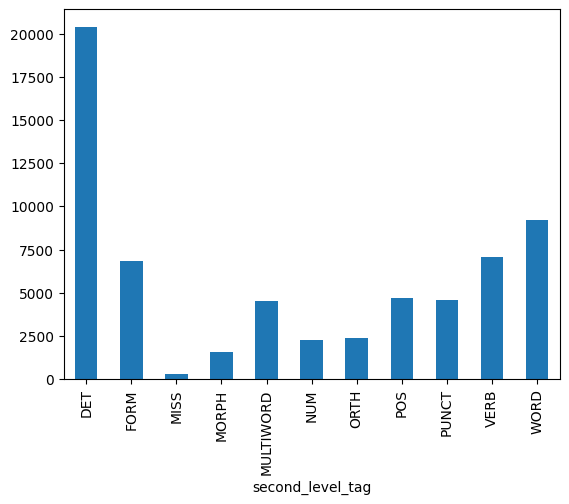

In [80]:
mistakes_labelling.groupby('second_level_tag').size().plot(kind='bar')

EKİNCİ M., EKİNCİ E 2020:

 - Grammar 
 - Spelling (unapplicable, replace with Capitalisation)
 - Punctuation
 - Word Order
 - Wrong Word
 - Omission 
 - Unnecessary Word

In [ ]:
mistakes_filtered_2['ekinchi_code'] = ['Grammar' if x in['Modals',
                                                        'Pronouns',
                                                        'Countable_uncountable',
                                                        'Prepositional_noun',
                                                        'Conjunctions',
                                                        'Verb_pattern',
                                                        'Determiners',
                                                        'Voice',
                                                        'Tense_form',
                                                        'Numerals',
                                                        'Prepositions',
                                                        'Noun_number',
                                                        'Tense_choice',
                                                        'Articles',
                                                        ''] else 'Wrong word' if x in ['Derivation',
                                                                                       'Formational_affixes',
                                                                                       'Word_choice',
                                                                                       'lex_item_choice',
                                                                                        'Category_confusion'] else 'Discourse' if x in ['Coherence',
                                                                                                                                               'Linking_device',
                                                                                                                                               'Ref_device',
                                                                                                                                               'Inappropriate_register',
                                                                                                                                               'lex_item_choice',
                                                                                                                                               'Absence_explanation',
                                                                                                                                               'Absence_comp_sent',
                                                                                                                                               'Redundant_comp'] else 'Syntax' if x in ['Word_order',
                                                                                                                                                                                        'Relative_clause',
                                                                                                                                                                                        'Confusion_of_structures'] else 'Punctuation' if x == 'Punctuation' else 'Capitalisation' if x == 'Capitalisation' else 'None' for x in mistakes_filtered_2['mistake_type']]

Nicholls 2003 (это кембридж, но сложнее имплементировать)
 - F wrong Form used
 - M something Missing
 - R word or phrase needs Replacing
 - U word or phrase is Unnecessary (i.e. redundant)
 - D word is wrongly Derived
 - P - punctuation (упрощение)

Eka Yuni Kurniati, Benni Ichsanda Rahman 2021:

 - Error in Time
 - Omission Error
 - Insertion Error
 - Part of Speech Error
 - Other Errors - Other errors are deviations in writing mechanisms that are inappropriate for the context.
This means that certain components of writing, such as diction, capitalization, word order, and
punctuation, are not correctly executed, resulting in a writing product that is disorganized and
unpleasant to read

Gould 2017

1. article errors 
2. capital letter error
3. intended meaning errors
4. missing word(s) errors
5. singular/plural errors
6. spelling errors
7. subject-verb agreement errors
8. verb tense errors
9. word order errors
10. wrong form errors
11. wrong word(s) used errors